<a href="https://colab.research.google.com/github/Edward-TL/amazon_scraper/blob/master/product_scraper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Start

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


#Import

In [81]:
#For the system
import os
from prettytable import PrettyTable, HEADER
from tabulate import tabulate
import re
import json

#Manage of time
from datetime import datetime, timedelta
from pytz import timezone
import time

#Manage of files
import pandas as pd
import csv

#scrap
from bs4 import BeautifulSoup
from openpyxl.workbook import Workbook
import requests

# Tools

## headers

In [3]:
headers_0 = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64;x64; rv:66.0) Gecko/20100101 Firefox/66.0",
           "Accept-Encoding":"gzip, deflate",
           "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8",
           "DNT":"1",
           "Connection":"close",
           "Upgrade-Insecure-Requests":"1"}

headers_1 = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5)AppleWebKit/605.1.15 (KHTML, like Gecko)Version/12.1.1 Safari/605.1.15",
           "Accept-Encoding":"gzip, deflate",
           "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8",
           "DNT":"1",
           "Connection":"close",
           "Upgrade-Insecure-Requests":"1"}

headers_2 = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36",
           "Accept-Encoding":"gzip, deflate",
           "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8",
           "DNT":"1",
           "Connection":"close",
           "Upgrade-Insecure-Requests":"1"}

headers_3 = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/54.0.2840.71 Safari/537.36',
           "Accept-Encoding":"gzip, deflate",
           "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8",
           "DNT":"1",
           "Connection":"close",
           "Upgrade-Insecure-Requests":"1"}

headers_tuple = (headers_1, headers_1, headers_2, headers_3)

## countries

In [4]:
countries = ['mx', 'br']

## Image ID

In [33]:
def image_id(complete_image_link):
    regex_a = '(?<=I\/)(.*)(?=\.jpg)'
    image_link_a = re.search(regex_a, complete_image_link)

    if not image_link_a:
        image_id = complete_image_link
    else:
        image_id = image_link_a.group()
    
    return image_id

In [5]:
%cd 'drive/My Drive/Colab Notebooks/4SS/4SS_db/testing/Masters'
!ls

/content/drive/My Drive/Colab Notebooks/4SS/4SS_db/testing/Masters
 br   master_db_logs.csv   mx  'Parquet backup'


# Product Page Scraper

In [6]:
def extract_soup(url, header=0, preview=True):
    header = headers_tuple[header]
    response = requests.get(url, headers=header)
    status = response.status_code

    soup = BeautifulSoup(response.text, 'lxml')

    if preview==True:
        print(soup.prettify())

    return soup, status

In [17]:
def extract_product_box(soup):
    box_soup = soup.find('div', attrs={'id':"ppd"})
    return box_soup

def extract_reviews(soup, principal=True):
    reviews = soup.find_all('div', attrs={'data-hook':"review"})
    
    if principal == True:
        principal_review = reviews[0]
        return principal_review

    return reviews


<img alt="Gigaton" class="a-dynamic-image a-stretch-horizontal" data-a-dynamic-image='{"https://images-na.ssl-images-amazon.com/images/I/819bem7XN7L._AC_SX385_.jpg":[385,385],"https://images-na.ssl-images-amazon.com/images/I/819bem7XN7L._AC_SX425_.jpg":[425,425],"https://images-na.ssl-images-amazon.com/images/I/819bem7XN7L._AC_SX466_.jpg":[466,466],"https://images-na.ssl-images-amazon.com/images/I/819bem7XN7L._AC_SX522_.jpg":[522,522],"https://images-na.ssl-images-amazon.com/images/I/819bem7XN7L._AC_SX679_.jpg":[679,679],"https://images-na.ssl-images-amazon.com/images/I/819bem7XN7L._AC_SX342_.jpg":[342,342],"https://images-na.ssl-images-amazon.com/images/I/819bem7XN7L._AC_SX569_.jpg":[569,569]}' data-old-hires="https://images-na.ssl-images-amazon.com/images/I/819bem7XN7L._AC_SL1200_.jpg" id="landingImage" onload="if(this.width/this.height &gt; 1.0){this.className += ' a-stretch-horizontal'}else{this.className += ' a-stretch-vertical'};this.onload='';" src="








" style="max-width:6
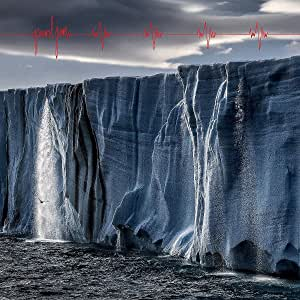

In [58]:
print(image_soup.prettify())

In [88]:
image_soup = landing_image(box_soup)
image_dict_string = image_soup.get("data-a-dynamic-image")
image_dict = json.loads(image_dict_string)
image_urls = [key for key in image_dict.keys()]
print(image_urls)


['https://images-na.ssl-images-amazon.com/images/I/819bem7XN7L._AC_SX385_.jpg', 'https://images-na.ssl-images-amazon.com/images/I/819bem7XN7L._AC_SX425_.jpg', 'https://images-na.ssl-images-amazon.com/images/I/819bem7XN7L._AC_SX466_.jpg', 'https://images-na.ssl-images-amazon.com/images/I/819bem7XN7L._AC_SX522_.jpg', 'https://images-na.ssl-images-amazon.com/images/I/819bem7XN7L._AC_SX679_.jpg', 'https://images-na.ssl-images-amazon.com/images/I/819bem7XN7L._AC_SX342_.jpg', 'https://images-na.ssl-images-amazon.com/images/I/819bem7XN7L._AC_SX569_.jpg']


In [128]:
'''Del inicio'''
def landing_bullets(box_soup):
    vertical_list = box_soup.find('ul', attrs={'class':"a-unordered-list a-vertical a-spacing-mini"})
    if vertical_list is not None:
        bullets = vertical_list.find('span', attrs={'class':"a-list-item"})
        return bullets
    else: return None

def images_array(box_soup):
    image_soup = box_soup.find('img', attrs={'id':"landingImage"})
    image_dict_string = image_soup.get("data-a-dynamic-image")
    image_dict = json.loads(image_dict_string)
    images_IDs = [image_id(key) for key in image_dict.keys()]
    return images_IDs

def product_stars(box_soup):
    stars_box = box_soup.find('span', attrs={'class':"a-icon-alt"})
    dot_comma = stars_box.get_text()[1:2]
    if dot_comma == ',':
        stars = float(stars_box.get_text()[:3].replace(',','.'))
    elif dot_comma == '.':
        stars = float(stars_box.get_text()[:3])
    else:
        stars = dot_comma
    return stars

def product_reviews(box_soup):
    reviews = box_soup.find('span', attrs={'id':"acrCustomerReviewText"})
    reviews_array = reviews.get_text().split()
    reviews = reviews_array[0]
    try:
        reviews = int(reviews.replace(',',''))
    except:
        reviews = int(reviews.replace('.',''))

    return reviews

def product_price(box_soup, original_soup, country):
    price = box_soup.find('span', attrs={'id':"priceblock_dealprice"})
    if price is None:
        buy_new_box = soup.find('div', attrs={'id':"buyBoxAccordion"})
        if buy_new_box is not None:
            buy_new_price = buy_new_box.find('span', attrs={'id':"newBuyBoxPrice"})
    
    if (buy_new_price is not None) or (price is not None):
        if country == 'mx':
            coin_symbol = 1
            price = float(buy_new_price.get_text()[coin_symbol:].replace(',',''))
            
        elif country == 'br':
            coin_symbol = 2
            price = float(buy_new_price.get_text()[coin_symbol:].replace('.','').replace(',','.'))
        
        return price

    else:
        return None

def product_description(soup):
    description_div = soup.find('div', attrs={'id':"productDescription"})
    description_body = description_div.find('p').get_text()

    return description_body

'''Review Principal'''
def principal_review_body(principal_review_soup):
    body_div = soup.find('div', attrs={'data-hook':"review-collapsed"})
    body = body_div.find('span').get_text()
    return body


def principal_review_stars(principal_review_soup):
    stars_box = soup.find('span', attrs={'class':"a-icon-alt"})
    dot_comma = stars_box.get_text()[1:2]
    if dot_comma == ',':
        stars = float(stars_box.get_text()[:3].replace(',','.'))
    elif dot_comma == '.':
        stars = float(stars_box.get_text()[:3])
    else:
        stars = dot_comma
    return stars

    return r_stars

#LAB TESTING

In [ ]:
country = 'mx'
products_dir = f'Products/{country}/parquet'
ID = "B083T61W5J"
product_url = f'https://www.amazon.com.{country}/dp/{ID}'
soup, status = extract_soup(product_url, preview=True)
# soup

In [129]:
box_soup = extract_product_box(soup)
principal_review = extract_reviews(soup, principal=True)

print("landing_bullets: ", landing_bullets(box_soup))
print("landing_image: ", images_array(box_soup))
print("product_stars: ", product_stars(box_soup))
print("product_reviews: ", product_reviews(box_soup))
print("product_price: ", product_price(box_soup, original_soup=soup, country=country))
print("product_description: ", product_description(soup))

print("principal_review_body: ", principal_review_body(principal_review))
print("principal_review_stars: ", principal_review_stars(principal_review))

landing_bullets:  None
landing_image:  ['819bem7XN7L._AC_SX385_', '819bem7XN7L._AC_SX425_', '819bem7XN7L._AC_SX466_', '819bem7XN7L._AC_SX522_', '819bem7XN7L._AC_SX679_', '819bem7XN7L._AC_SX342_', '819bem7XN7L._AC_SX569_']
product_stars:  4.7
product_reviews:  840
product_price:  409.0
product_description:  Gigaton pone a Pearl Jam en el punto más alto de su evolución. Va desde momentos de catarsis alimentados por la guitarra como en "Who Ever Said" hasta la helada absolución de "River Cross"; las letras, los riffs y los ritmos transmiten un mensaje de esperanza, que culmina con las últimas palabras de Eddie Vedder: "Aquí y ahora... ganó no nos sujetes... comparte la luz... no nos detendrá". Producido por Josh Evans y Pearl Jam, Gigaton marca el primer álbum de estudio de la banda desde el galardonado al GRAMMY, Lightning Bolt, que fue lanzado el 15 de octubre de 2013.


principal_review_body:  
  Un excelente regreso que demuestra que tenemos PJ para rato. Clairevoyants y quick escape 

# Product DB Generator

In [ ]:
db_widgets=[
'[', progressbar.Timer(), ']',
'[', progressbar.Percentage(), ']',
'[',file_name, ']',
progressbar.Bar(marker='▥'),
'[', progressbar.Timer(), ']',
]

In [ ]:
def main_files_bar_check(info, scraper_dir, products_dir, country=None):

    centered_db = centered_len(info[1])

    df_names = info[0]
    total = 0
    for n in range(len(df_names)):

        #file name extract
        parquet_len = len('.parquet')
        file_name_len = len(df_names[n])-parquet_len
        file_name = df_names[n][0:file_name_len]

        #File name print to log

        #--------Edition--------
        #Load Dataframe
        product_check_dir = f'{products_dir}/{df_names[n]}'
        product_check = pd.read_parquet(product_check_dir)

        IDs = product_check['Product ID'].to_list()
  

        for element in progressbar.progressbar(range(len(IDs)), widgets=db_widgets):
            ...

        prod_shape = product_check.shape
        rows = prod_shape[0]
        total += rows

    time_estimated = (total * 0.15)/ 60

    row_info = [country,total, time_estimated]
    